### **Getting Started**

**Workshop Best Practices**

*   Copy this notebook so you could edit on your own.
*   Make sure your notebook is connected.
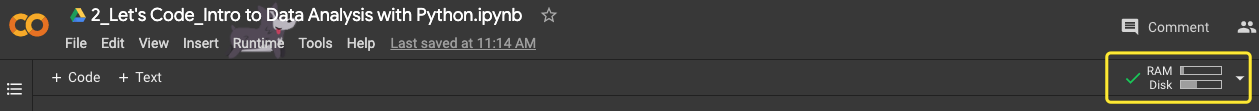
*   This will be a live coding session. Feel free to edit the code on your copy.
*   **How to run**? Click on the little arrow besides each chunk of code, or click on 'Runtime' - 'Run Selection'.
  *   Run the code chunk-by-chunk, don't run all at once.
  *   Some codes are dependent on previous codes, if you hit an error, check if you have ran the previous codes.
*   If you feel the pace is too fast, please let the instructor know. Otherwise, save your questions till the end of each section.


If you have not installed plotly yet, run the following:

In [ ]:
pip install plotly

### Task 0: Importing Libraries

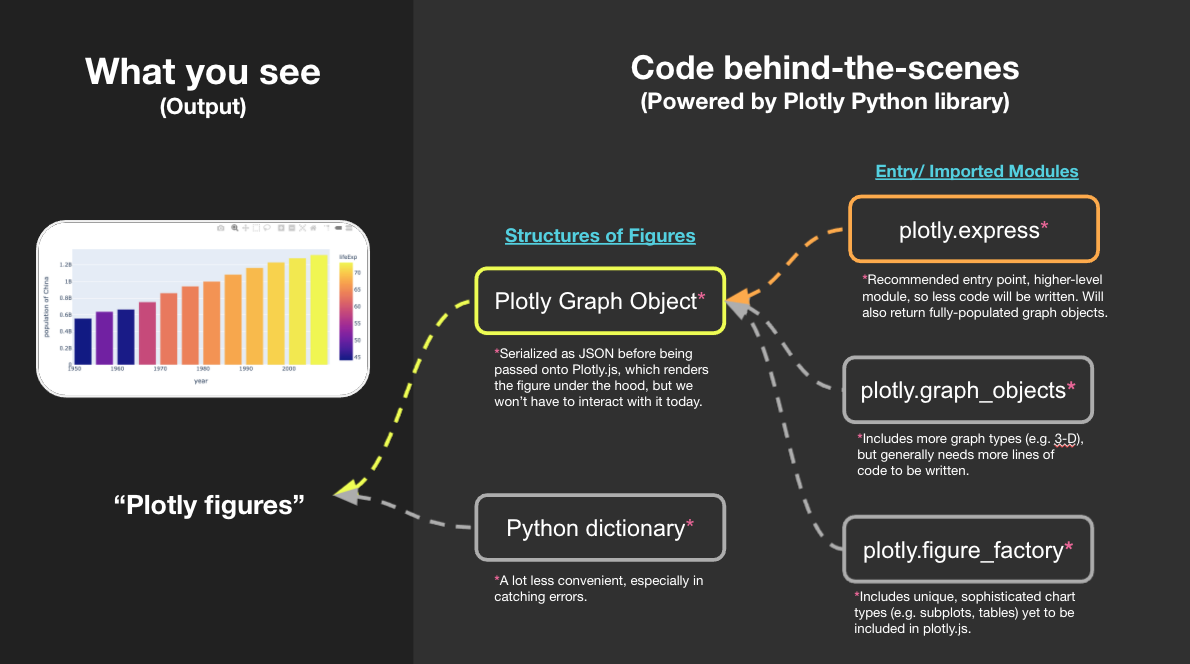



1.   The [plotly.express](https://plotly.com/python/plotly-express/) module is the recommended entry point, for it is a higher-level module compared to plotly.graph_objects.


In [ ]:
import plotly.express as px
type(px)

module



2.   To preview the dataset, we will be trying out using the DataFrame.head() function from [Pandas](https://pandas.pydata.org/docs/) vs the create_table function from [plotly.figure_factory](https://plotly.com/python/figure-factory-subplots/), which is a graphing module that has even more unique chart types yet included in plotly.js.

In [ ]:
import pandas as pd
type(pd)

module

In [ ]:
from plotly.figure_factory import create_table
type(create_table)

function

### Task 1: Loading Data

The data we are using today is the built-in demo data of **Plotly.express** module.\
The demo data is from Gapminder, detailing the life expectancy, population, GDP change every five years from 1952 to 2007.\
As you may know, in a data science life cycle, up to 80% of the time may be devoted to cleaning and processing data. The demo data we are using today has been cleaned and is ready for use.\
The main goal of today is to explore the different functionalities of the Plotly library, and this cleaned data will serve our purpose well.

In [ ]:
# define our data
gapminder = px.data.gapminder()

Let's preview our data.


1.   Using our old friend, Pandas.


In [ ]:
pd.DataFrame.head(gapminder)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


2.  Using plotly.figure_factory (also known as "ff" by abbreviation) module.

In [ ]:
table = create_table(gapminder.head(5)) #display the first 10 rows
table

### Task 2: Visualize Population Change with Bar Chart


In [ ]:
data_china = gapminder.query("country == 'China'")
print(data_china)
# Let's visualize population (variable name: "pop") using bar chart!
# We will use px.bar(dataset, x=[x variable name], y=[y variable name name])

    country continent  year  ...    gdpPercap  iso_alpha  iso_num
288   China      Asia  1952  ...   400.448611        CHN      156
289   China      Asia  1957  ...   575.987001        CHN      156
290   China      Asia  1962  ...   487.674018        CHN      156
291   China      Asia  1967  ...   612.705693        CHN      156
292   China      Asia  1972  ...   676.900092        CHN      156
293   China      Asia  1977  ...   741.237470        CHN      156
294   China      Asia  1982  ...   962.421380        CHN      156
295   China      Asia  1987  ...  1378.904018        CHN      156
296   China      Asia  1992  ...  1655.784158        CHN      156
297   China      Asia  1997  ...  2289.234136        CHN      156
298   China      Asia  2002  ...  3119.280896        CHN      156
299   China      Asia  2007  ...  4959.114854        CHN      156

[12 rows x 8 columns]


In [ ]:
bar = px.bar(data_china, x = "year", y = "pop")
bar.show()

**Next, let's add some more functionalities to our graph**
*  Color scale (color): we can use a color scale to indicate life expectancy ("lifeExp").\
There are different built-in continous [color scales](https://plotly.com/python/builtin-colorscales/) in Plotly Express.
*  Hover label (hover_data): The hover label by default only shows x, y data. If we want to add more, we can pass in different data variables.
*  Change data label (labels): Since some data name is abbreviated (e.g. "pop"), we would want to spell it out in the hover label, so to clarify their meaning.

In [ ]:
bar = px.bar(data_china, x = "year", y = "pop", color = "lifeExp", color_continuous_scale = "Earth")
bar.show()


In [ ]:
bar = px.bar(data_china, x = "year", y = "pop", color = "lifeExp", color_continuous_scale = "Magenta")
bar.show()


### Task 3: Visualize GDP and Life Expectancy Data with Scatter Plot


In [ ]:
# let's say we want to take a snapshot of the world in 2007
# and observe if the GDP influences the life expectancy
gapminder2007 = gapminder.query("year == 2007") #2007 is a integer value, so it does not be enclosed in another pair of quotes

In [ ]:
# make a basic scatter plot with px.scatter(data, x, y)
# life expectancy is "lifeExp", GDP per capita is "gdpPercap"
scatter = px.scatter(gapminder2007, x = "gdpPercap", y = "lifeExp")
scatter.show()

In [ ]:
# let's color the data points by continents using the "color" attribute
scatter = px.scatter(gapminder2007, x = "gdpPercap", y = "lifeExp", color = "continent", hover_data = ['country', 'year'])
scatter.show()

### Task 4: Customize Interactive Bubble Charts according to Population Size


In [ ]:
# let's say we want to advance our scatter plot into a bubble chart
# and we want the size of the data points to change according to population size
# we would want to pass in "size" attribute
scatter = px.scatter(gapminder2007, x = "gdpPercap", y = "lifeExp", 
                     color = "continent", hover_data = ['country', 'year'],
                     size = "pop")
scatter.show()

In [ ]:
# what do you notice about the bubbles?
# size_max is default 20.
# Should we change something?
scatter = px.scatter(gapminder2007, x = "gdpPercap", y = "lifeExp", 
                     color = "continent", hover_data = ['country', 'year'],
                     size = "pop", size_max = 60)
scatter.show()

Full documentation on [Scatter Plot](https://plotly.com/python-api-reference/generated/plotly.express.scatter) in plotly.express, which has size_max info.

In [ ]:
# we need to know what countries are they
# so to help us get insights for outliers
# let's add in another attribute called "hover_name", which will be an overarching title for the hover label.
scatter = px.scatter(gapminder2007, x = "gdpPercap", y = "lifeExp", 
                     color = "continent", hover_data = ['year'],
                     size = "pop", size_max = 60,
                     hover_name = 'country')
scatter.show()

## Task 5: Create Facet Plots by Continent


[Facet charts](https://plotly.com/python/facet-plots/) can be used to split a multi-trace data visualization into a matrix of data panels.\
In Plotly.express, if you want to facet a larger plot into multiple smaller plots, you simply pass in the variable you want to facet by into an attribute called "facet_col".

In [ ]:
# copy the previous code, add in "facet_col" attribute
# isolate by continent
# setting legends
# log x-axis: transformation of graphs
scatter = px.scatter(gapminder2007, x = "gdpPercap", y = "lifeExp", 
                     color = "continent", hover_data = ['year'],
                     size = "pop", size_max = 60,
                     hover_name = 'country',
                     facet_col = "continent",
                     log_x = True)
scatter.show()

### Interpretation Challenge: What insights can you gain from this graph?

Write it here:

## Task 6: Add Animation to Facet Plots

Let's create animation so that the we can observe the yearly change of GDP VS Life Expectancy data. Code the following:
*  "animation_frame": by which variable do you want to observe in every frame of that animation
* "animation_group": sets which data point match which ones across the animation (i.e. each data point represents a country)
* specify range of x and y axis, range_x=[100,100000], range_y=[25,90]
* "labels": rename abbreviated labels

In [ ]:
# start by copying the previous code
# change data attribtue to entire dataset, "gapminder"
scatter = px.scatter(gapminder, x = "gdpPercap", y = "lifeExp", 
                     color = "continent", hover_data = ['year'],
                     size = "pop", size_max = 60,
                     hover_name = 'country',
                     facet_col = "continent",
                     log_x = True,
                     animation_frame = "year",
                     animation_group = 'country',
                     range_y = [25, 90],
                     labels = {"pop": "Population",
                               "lifeExp": "Life Expectancy"}
                     )
scatter.show()

## Task 7: Represent Geographic Data as Animated Maps


Choropleths are thematic maps in which areas are shaded/ patterned in proportion to the measurement of the displayed statistical variable.\
We are going to shade our maps by lifeExp using our entire dataset.

What is "locations" ='iso_alpha'?
*  ISO 3166-1 alpha-2 codes are two-letter country codes defined in ISO 3166-1
*  In other words, it's a convention to specify locations
*  More on locations [here](https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html), there are other attributes that define location (e.g. geojson).

In [ ]:
# add in 'location'
# 'color', "hover_name", "animation_frame", "projection"
# "color_continuous_scale"
choro = px.choropleth(gapminder, locations = "iso_alpha", color = "lifeExp",
                      hover_name = "country", animation_frame = "year", 
                      projection = "natural earth", color_continuous_scale = "Viridis")

choro.show()
# add in other hover info with "hover_data"
# "color_continuous_scale": because we want the scale to be continuous rather than discrete
# sequential = continuous

In [ ]:
# try changing a color scale (e.g. Viridis)
# try changing the "projection" to orthographic

## Task 8: [Line Plots](https://plotly.com/python/line-charts/) VS [Area Plots](https://plotly.com/python/filled-area-plots/)


In [ ]:
fig = px.line(gapminder, x="year", y="lifeExp", color="continent", line_group="country", hover_name="country",
        line_shape="spline", render_mode="svg")
fig.show()

In [ ]:
fig = px.area(gapminder, x="year", y="lifeExp", color="continent", line_group="country", hover_name="country")
fig.show()